In [2]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [5]:
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/x_train.csv'
x_train = pd.read_csv(url)
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/y_train.csv'
y_train = pd.read_csv(url)
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/x_test.csv'
x_test = pd.read_csv(url)
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/y_test.csv'
y_test = pd.read_csv(url)
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Datasets/test.csv'
test = pd.read_csv(url)
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset%20Update/Submission%20Test.csv'
submission_test = pd.read_csv(url)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.fit_transform(x_test)

In [7]:
param_grid = {'splitter': ['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [100, 200]}
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, refit=True, verbose=2)
grid.fit(x_train.to_numpy(), y_train.to_numpy().ravel())
print(grid.best_estimator_)
grid_predictions = grid.predict(x_test.to_numpy())

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ....max_depth=100, max_features=auto, splitter=best; total time=   4.8s
[CV] END ....max_depth=100, max_features=auto, splitter=best; total time=   4.6s
[CV] END ....max_depth=100, max_features=auto, splitter=best; total time=   4.6s
[CV] END ....max_depth=100, max_features=auto, splitter=best; total time=   4.6s
[CV] END ....max_depth=100, max_features=auto, splitter=best; total time=   4.6s
[CV] END ..max_depth=100, max_features=auto, splitter=random; total time=   1.5s
[CV] END ..max_depth=100, max_features=auto, splitter=random; total time=   1.6s
[CV] END ..max_depth=100, max_features=auto, splitter=random; total time=   1.5s
[CV] END ..max_depth=100, max_features=auto, splitter=random; total time=   1.6s
[CV] END ..max_depth=100, max_features=auto, splitter=random; total time=   1.5s
[CV] END ....max_depth=100, max_features=sqrt, splitter=best; total time=   0.9s
[CV] END ....max_depth=100, max_features=sqrt, s

In [8]:
DTR = DecisionTreeRegressor(max_depth=200, max_features='auto').fit(x_train,y_train)
train_score = DTR.score(x_train, y_train)
test_score = DTR.score(x_test, y_test)
test_score

0.9628705886814559

In [9]:
y_pred = DTR.predict(x_test)

In [10]:
from sklearn.model_selection import learning_curve

train_size = [1, 25, 50, 100, 500, 2500, 7500, 15000]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = DTR,
X = x_train,
y = y_train, train_sizes = train_size, cv = 5,
scoring = 'neg_mean_absolute_error')

In [11]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-0.0000000e+00 -0.0000000e+00 -0.0000000e+00 -0.0000000e+00
  -0.0000000e+00]
 [-0.0000000e+00 -0.0000000e+00 -0.0000000e+00 -0.0000000e+00
  -0.0000000e+00]
 [-0.0000000e+00 -0.0000000e+00 -0.0000000e+00 -0.0000000e+00
  -0.0000000e+00]
 [-0.0000000e+00 -0.0000000e+00 -0.0000000e+00 -0.0000000e+00
  -0.0000000e+00]
 [-0.0000000e+00 -0.0000000e+00 -0.0000000e+00 -0.0000000e+00
  -0.0000000e+00]
 [-0.0000000e+00 -0.0000000e+00 -0.0000000e+00 -0.0000000e+00
  -0.0000000e+00]
 [-0.0000000e+00 -0.0000000e+00 -0.0000000e+00 -0.0000000e+00
  -0.0000000e+00]
 [-0.0000000e+00 -8.8817842e-20 -8.8817842e-20 -8.8817842e-20
  -8.8817842e-20]]

 ----------------------------------------------------------------------

Validation scores:

 [[ -8.39141123  -8.60042692  -8.6011486   -8.62125502  -8.64469222]
 [-11.61640411 -10.5527849  -11.70239138 -10.7526326  -11.5177846 ]
 [ -9.72262664 -10.50252162 -10.64307815 -10.60593867 -10.63105801]
 [ -8.33165843  -9.16456159  -9.20204138 

In [12]:
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1        0.000000e+00
25       0.000000e+00
50       0.000000e+00
100      0.000000e+00
500      0.000000e+00
2500     0.000000e+00
7500     0.000000e+00
15000   -7.105427e-20
dtype: float64

 --------------------

Mean validation scores

 1        -8.571787
25      -11.228400
50      -10.421045
100      -9.064235
500      -6.745178
2500     -4.028164
7500     -2.779174
15000    -2.181916
dtype: float64


In [13]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1       -0.000000e+00
25      -0.000000e+00
50      -0.000000e+00
100     -0.000000e+00
500     -0.000000e+00
2500    -0.000000e+00
7500    -0.000000e+00
15000    7.105427e-20
dtype: float64

 --------------------

Mean validation scores

 1         8.571787
25       11.228400
50       10.421045
100       9.064235
500       6.745178
2500      4.028164
7500      2.779174
15000     2.181916
dtype: float64


In [14]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
print('Mean Abs Error:', mean_absolute_error(y_test, y_pred))

Mean squared error: 3.67
Coefficient of determination: 0.96
Mean Abs Error: 1.173942173669518


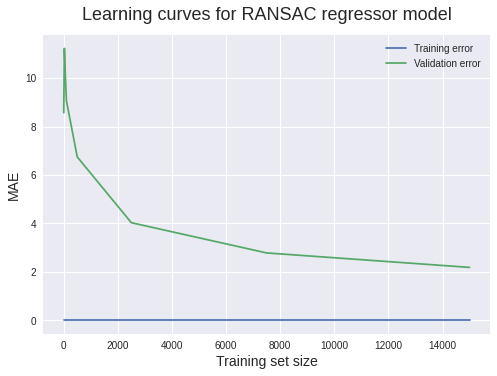

In [15]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MAE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for RANSAC regressor model', fontsize = 18, y = 1.03)
plt.legend()

In [ ]:
Id = test['Store'].astype('string') + '_' + test['Dept'].astype('string') + '_' + test['Date'].astype('string')
y_pred = grid.predict(submission_test)
weekly_sales = np.round(y_pred**3, 2)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [ ]:
sub = {'Id':Id, 'Weekly_Sales':weekly_sales}
DTR_submission = pd.DataFrame(data=sub)
DTR_submission

,Id,Weekly_Sales
0,1_1_2012-11-02,55931.23
1,1_1_2012-11-09,42371.48
2,1_1_2012-11-16,9825.22
3,1_1_2012-11-23,47893.23
4,1_1_2012-11-30,33232.94
...,...,...
115059,45_98_2013-06-28,13143.44
115060,45_98_2013-07-05,31697.66
115061,45_98_2013-07-12,33433.21
115062,45_98_2013-07-19,7472.35


In [ ]:
from google.colab import drive
drive.mount('drive')
DTR_submission.to_csv('DTR_submission.csv')
!cp DTR_submission.csv "drive/My Drive/"

Mounted at drive
